In [3]:
import pandas as pd
import numpy as np

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('/home/lucasarenhardt/Documents/GitHub/LAMIA/10/ArquivosdeCodigo/u.data', sep='\t', names = r_cols,usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [4]:
#calcula a media das notas por filme
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

/tmp/ipykernel_7029/1813825710.py:2: FutureWarning: The provided callable <function mean at 0x7b177bfe4f70> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})


rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [5]:
#normalizando o numero de avaliacoes para obter uma melhor escala
#0 significa que ninguem avaliou e 1 significa que é o mais avaliado
movieNumratings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumratings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [6]:
#obtem o nome, genero, popularidade e classificacao media dos filmes
#tudo isso é guardado em um dicionario
movieDict = {}
with open(r'/home/lucasarenhardt/Documents/GitHub/LAMIA/10/ArquivosdeCodigo/u.item') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, np.array(list(genres)), movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))

In [7]:
movieDict[10]

('Richard III (1995)',
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 0.1509433962264151,
 3.831460674157303)

In [8]:
from scipy import spatial

#essa funcao calcula a distancia entre dois filmes

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    #calcula a similaridade entre os generos
    genreDistance = spatial.distance.cosine(genresA, genresB)
    #obtem a popularidade dos dois filmes e simplesmente realiza a subtracao entre os valores
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

ComputeDistance(movieDict[1], movieDict[11])

1.3704974271012007

In [9]:
print(movieDict[1])
print(movieDict[11])

('Toy Story (1995)', array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.7735849056603774, 3.8783185840707963)
('Seven (Se7en) (1995)', array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 0.40308747855917665, 3.847457627118644)


In [10]:
import operator

#essa funcao obtem os K vizinhos mais proximos do filme escolhido
#prieiramente ela calcula as distancias entre o filme escolhido e todos os demais
#em seguida, as distancias sao ordenadas e as K primeiras sao escolhidas
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 10
avgRating = 0
neighbors = getNeighbors(1, K)
#calcula a media de classificacao dos K vizinhos
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

avgRating /= float(K)

Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537
Willy Wonka and the Chocolate Factory (1971) 3.6319018404907975
Monty Python and the Holy Grail (1974) 4.0664556962025316
Full Monty, The (1997) 3.926984126984127
George of the Jungle (1997) 2.685185185185185
Beavis and Butt-head Do America (1996) 2.7884615384615383
Birdcage, The (1996) 3.4436860068259385
Home Alone (1990) 3.0875912408759123
Aladdin and the King of Thieves (1996) 2.8461538461538463


In [11]:
avgRating

3.3445905900235564

# Dimensionality Reduction

# Principal Component Analysis (PCA)

In [12]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

#carregando o dataset de flores
iris = load_iris() 

numSamples, numFeatures = iris.data.shape 
#printa as informacoes de numero de amostras, numero de dimensoes e as diferentes especies
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [13]:
X = iris.data
#realizando a trasnformacao para 2 dimensoes
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [14]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [15]:
#os seguintes numeros mostram que aproximadamente 97% da informacao
#foi preservada, o que significa que 4 dimensoes nao eram extremamente necessarias
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.9776852063187977


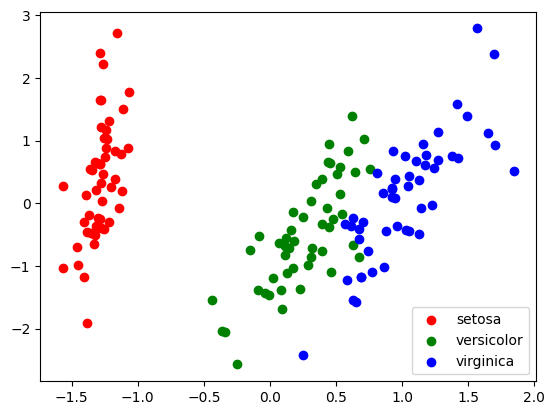

In [16]:
from matplotlib import pyplot
%matplotlib inline

#plotando um diagrama de dispersao
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()

# Reinforcement Leaning & Q-Learning

In [17]:
import gym
import random

random.seed(1234)

streets = gym.make("Taxi-v3", render_mode = 'ansi').env 
streets.reset()
print("\n" + streets.render())


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




-R, G, B e Y são pontos de início e fim

-A letra azul indica o local onde deve-se buscar o passageiro

-A letra magenta indica o destino do passageiro

-As linhas sólidas representam paredes que o táxi não pode cruzar

-O retângulo representa o táxi (amarelo quando vazio e verde quando carregando um passageiro)

-Em cada estado há 6 possibilidades: mover para norte, sul, leste e oeste, pegar um passageiro ou deixar um passageiro

-Deixar um passageiro no local correto vale +20 pontos

-Cada passo dado com um passageiro vale -1 ponto

-Pegar um passageiro ou deixar no local errado vale -10 pontos

In [18]:
#estado inicial
initial_state = streets.encode(2, 3, 2, 0)

streets.s = initial_state #define o estado inicial para initial_state 
streets.reset()
print("\n" + streets.render())


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [19]:
streets.P[initial_state]
#imprime a tabela de recompensas

{0: [(1.0, 368, -1, False)],
 1: [(1.0, 168, -1, False)],
 2: [(1.0, 288, -1, False)],
 3: [(1.0, 248, -1, False)],
 4: [(1.0, 268, -10, False)],
 5: [(1.0, 268, -10, False)]}

In [20]:
import numpy as np

streets = gym.make("Taxi-v3", render_mode='ansi').env

#cria a tabela Q
q_table = np.zeros([streets.observation_space.n, streets.action_space.n])

#define os parametros
learning_rate = 0.1
discount_factor = 0.6
exploration = 0.1
epochs = 10000

#treinamento
for taxi_run in range(epochs):
    state = streets.reset()
    if isinstance(state, tuple):
        state = state[0] 
    done = False
    
    while not done:
        random_value = random.uniform(0, 1)
        if random_value < exploration:
            action = streets.action_space.sample() #explora uma ação aleatória
        else:
            action = np.argmax(q_table[state]) #utiliza a ação com o maior valor Q
        
        next_state, reward, done, truncated, info = streets.step(action)  #executa
        if isinstance(next_state, tuple):
            next_state = next_state[0]  
        
        prev_q = q_table[state, action]
        next_max_q = np.max(q_table[next_state])
        new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
        q_table[state, action] = new_q
        
        state = next_state  #atualiza o estado

/home/lucasarenhardt/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [21]:
q_table[initial_state]

array([-2.40555888, -2.40532219, -2.4068419 , -2.3639511 , -8.43363625,
       -6.86145239])

# K-Fold Cross Validation

In [22]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm

In [23]:
#divide os dados do iris em pacotes de treino e teste, com 40% reservado para teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

#constrói um modelo SVC para predizer as classificacões do iris usando dados de treinamento
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

#mede o desempenho com os dados de teste
clf.score(X_test, y_test)

0.9666666666666667

In [24]:
#corss_val_score recebe um modelo, o dataset, os valores reais e o número de dobras:
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

#imprime a precisão para cada dobra
print(scores)

#imprime a precisão média de todas as dobras
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


# Data Cleaning

In [25]:
import re

#formata uma linha de acesso ao log
format_pat= re.compile(
    r"(?P<host>[\d\.]+)\s"
    r"(?P<identity>\S*)\s"
    r"(?P<user>\S*)\s"
    r"\[(?P<time>.*?)\]\s"
    r'"(?P<request>.*?)"\s'
    r"(?P<status>\d+)\s"
    r"(?P<bytes>\S*)\s"
    r'"(?P<referer>.*?)"\s'
    r'"(?P<user_agent>.*?)"\s*'
)

In [29]:
logPath = "/home/lucasarenhardt/Documents/GitHub/LAMIA/10/ArquivosdeCodigo/access_log.txt"

In [32]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match = format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            if ' ' in request:
                (action, URL, protocol) = request.split(' ', 2)
                if URL in URLCounts:
                    URLCounts[URL] += 1
                else:
                    URLCounts[URL] = 1

#faz a ordenação
results = sorted(URLCounts, key=lambda i: URLCounts[i], reverse=True)

#imprime os 20 URLs mais frequentes
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/xmlrpc.php: 68494
/wp-login.php: 1923
/: 440
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70


In [ ]:
URLCounts = {}

#processa somente as ações GET, e não as POST
with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            fields = request.split()
            if (len(fields) == 3):
                (action, URL, protocol) = fields
                if (action == 'GET'):
                    if URL in URLCounts:
                        URLCounts[URL] = URLCounts[URL] + 1
                    else:
                        URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

#ainda não é capaz de de separar um acesso humano de um script

In [33]:
UserAgents = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent'] 
            if agent in UserAgents:
                UserAgents[agent] = UserAgents[agent] + 1
            else:
                UserAgents[agent] = 1

#ordena os agentes por num de ocorrências
results = sorted(UserAgents, key=lambda i: int(UserAgents[i]), reverse=True)

#imprime todos os agentes
for result in results:
    print(result + ": " + str(UserAgents[result]))

#mesmo com essas modificações, ainda não é possível distinguir totalmente
#acessos por scripts de acessos por humanos

Mozilla/4.0 (compatible: MSIE 7.0; Windows NT 6.0): 68484
-: 4035
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.0): 1724
W3 Total Cache/0.9.4.1: 468
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html): 278
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html): 248
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.86 Safari/537.36: 158
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0: 144
Mozilla/5.0 (iPad; CPU OS 8_4 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12H143 Safari/600.1.4: 120
Mozilla/5.0 (Linux; Android 5.1.1; SM-G900T Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.76 Mobile Safari/537.36: 47
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm): 43
Mozilla/5.0 (compatible; MJ12bot/v1.4.5; http://www.majestic12.co.uk/bot.php?+): 41
Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.1

In [34]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            #filtra os agentes de forma a ignorar os que contém 'bot', 'Bot', 'spider', 'Spider', 'W3 Total Cache' ou '-'
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (action == 'GET'):
                        if URL in URLCounts:
                            URLCounts[URL] = URLCounts[URL] + 1
                        else:
                            URLCounts[URL] = 1

#ordena
results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

#imprime o top 20
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

#o problema agora é que aparecem muitas coisas que não são web pages

/: 77
/orlando-headlines/: 36
/?page_id=34248: 28
/wp-content/cache/minify/000000/M9AvyUjVzUstLy7PLErVz8lMKkosqtTPKtYvTi7KLCgpBgA.js: 27
/wp-content/cache/minify/000000/M9bPKixNLarUy00szs8D0Zl5AA.js: 27
/wp-content/cache/minify/000000/lY7dDoIwDIVfiG0KxkfxfnbdKO4HuxICTy-it8Zw15PzfSftzPCckJem-x4qUWArqBPl5mygZLEgyhdOaoxToGyGaiALiOfUnIz0qDLOdSZGE-nOlpc3kopDzrSyavVVt_veb5qSDVhjsQ6dHh_B_eE_z2pYIGJ7iBWKeEio_eT9UQe4xHhDll27mGRryVu_pRc.js: 27
/wp-content/cache/minify/000000/fY45DoAwDAQ_FMvkRQgFA5ZyWLajiN9zNHR0O83MRkyt-pIctqYFJPedKyYzfHg2PzOFiENAzaD07AxcpKmTolORvDjZt8KEfhBUGjZYCf8Fb0fvA1TXCw.css: 25
/?author=1: 21
/wp-content/cache/minify/000000/hcrRCYAwDAXAhXyEjiQ1YKAh4SVSx3cE7_uG7ASr4M9qg3kGWyk1adklK84LHtRj_My6Y0Pfqcz-AA.js: 20
/wp-content/uploads/2014/11/nhn1.png: 19
/wp-includes/js/wp-emoji-release.min.js?ver=4.3.1: 17
/wp-content/cache/minify/000000/BcGBCQAgCATAiUSaKYSERPk3avzuht4SkBJnt4tHJdqgnPBqKldesTcN1R8.js: 17
/wp-login.php: 16
/comics-2/: 12
/world/: 12
/favicon.ico: 10
/wp-content/up

In [35]:
#para resolver o problema, é adicionado um filtro para pegar somente o que termina com uma barra (/)
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (URL.endswith("/")):
                        if (action == 'GET'):
                            if URL in URLCounts:
                                URLCounts[URL] = URLCounts[URL] + 1
                            else:
                                URLCounts[URL] = 1
# Ordena os URLs pelo número de acessos 
results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)


# Imprime os 20 URLs mais acessados
for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 77
/orlando-headlines/: 36
/comics-2/: 12
/world/: 12
/weather/: 4
/australia/: 4
/about/: 4
/national-headlines/: 3
/feed/: 2
/sample-page/feed/: 2
/science/: 2
/technology/: 2
/entertainment/: 1
/san-jose-headlines/: 1
/business/: 1
/travel/feed/: 1


# Dealing With Outliers

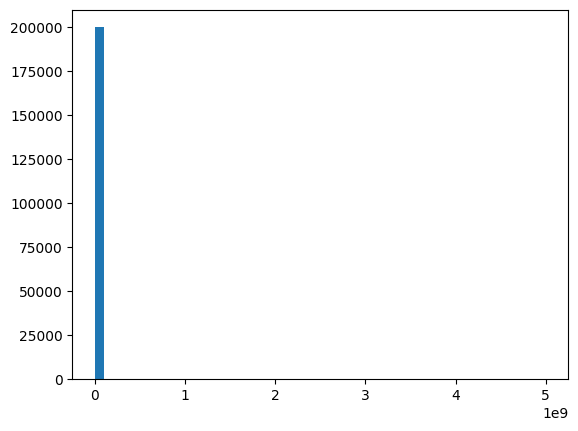

In [45]:
%matplotlib inline

import numpy as np

incomes = np.random.normal(5000, 2000, 200000)
incomes = np.append(incomes, [5000000000])

import matplotlib.pyplot as plt 
plt.hist(incomes, 50)
plt.show()

#um ponto discrepante não permite visualizar o gráfico de uma boa forma

In [46]:
incomes.mean()

29992.080084262285

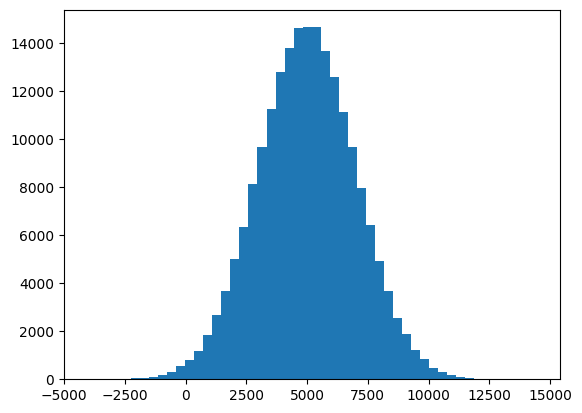

In [47]:
#para resolver esse problema, pode-se filtrar os valores com base em medidas estatísticas
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)] #mantém apenas os dados que estão dentro do intervalo de +- 2 desvioes padrões da mediana
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

In [48]:
np.mean(filtered)

4992.2300446627005